In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import sklearn


#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)


In [146]:
climacell =  pd.read_csv('climacell_data_formodel.csv')

In [147]:
climacell

,date_time,date,time,irradiance,ambient_temp,wind_speed
0,2020-08-20 06:05:00+05:30,20-08-2020,06:05:00,0,28.58,6.33
1,2020-08-20 06:10:00+05:30,20-08-2020,06:10:00,0,28.57,6.26
2,2020-08-20 06:15:00+05:30,20-08-2020,06:15:00,0,28.57,6.18
3,2020-08-20 06:20:00+05:30,20-08-2020,06:20:00,0,28.56,6.11
4,2020-08-20 06:25:00+05:30,20-08-2020,06:25:00,0,28.56,6.03
...,...,...,...,...,...,...
2947,2020-10-20 11:40:00+05:30,20-10-2020,11:40:00,322,30.24,3.10
2948,2020-10-20 11:45:00+05:30,20-10-2020,11:45:00,322,30.25,3.14
2949,2020-10-20 11:50:00+05:30,20-10-2020,11:50:00,322,30.26,3.19
2950,2020-10-20 11:55:00+05:30,20-10-2020,11:55:00,322,30.26,3.24


In [55]:
df = pd.read_csv('weather_data_from_plant.csv')

In [56]:
df

,date_time,ambient_temp,wind_speed,irradiance
0,2020-08-21T06:26:01.000Z,28.185780,0.28164,0.000000
1,2020-08-21T06:27:01.000Z,28.185780,0.28164,0.000000
2,2020-08-21T06:28:01.000Z,28.185780,0.28164,0.000000
3,2020-08-21T06:29:01.000Z,28.185780,0.28164,0.000000
4,2020-08-21T06:30:01.000Z,28.170719,0.28164,3.442247
...,...,...,...,...
79907,2020-10-20T12:57:01.000Z,36.253342,0.28164,749.843811
79908,2020-10-20T12:58:01.000Z,36.238201,1.88136,753.283386
79909,2020-10-20T12:59:01.000Z,36.088779,0.28164,753.283386
79910,2020-10-20T13:00:01.000Z,35.983109,0.28164,753.283386


In [57]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79912 entries, 0 to 79911
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     79912 non-null  object 
 1   ambient_temp  79912 non-null  float64
 2   wind_speed    79912 non-null  float64
 3   irradiance    79912 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.4+ MB


In [58]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.tz_convert('Asia/Kolkata')
df = df.set_index('date_time')
df.head()

,ambient_temp,wind_speed,irradiance
date_time,,,
2020-08-21 11:56:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:57:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:58:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:59:01+05:30,28.185780,0.28164,0.000000
2020-08-21 12:00:01+05:30,28.170719,0.28164,3.442247


In [59]:
df

,ambient_temp,wind_speed,irradiance
date_time,,,
2020-08-21 11:56:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:57:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:58:01+05:30,28.185780,0.28164,0.000000
2020-08-21 11:59:01+05:30,28.185780,0.28164,0.000000
2020-08-21 12:00:01+05:30,28.170719,0.28164,3.442247
...,...,...,...
2020-10-20 18:27:01+05:30,36.253342,0.28164,749.843811
2020-10-20 18:28:01+05:30,36.238201,1.88136,753.283386
2020-10-20 18:29:01+05:30,36.088779,0.28164,753.283386


### Sample the dataset to contain one hour data 

12:00 am 13:00am , etc

In [67]:
df.index

DatetimeIndex(['2020-08-21 11:56:01+05:30', '2020-08-21 11:57:01+05:30',
               '2020-08-21 11:58:01+05:30', '2020-08-21 11:59:01+05:30',
               '2020-08-21 12:00:01+05:30', '2020-08-21 12:01:01+05:30',
               '2020-08-21 12:02:01+05:30', '2020-08-21 12:03:01+05:30',
               '2020-08-21 12:04:01+05:30', '2020-08-21 12:05:01+05:30',
               ...
               '2020-10-20 18:22:01+05:30', '2020-10-20 18:23:01+05:30',
               '2020-10-20 18:24:01+05:30', '2020-10-20 18:25:01+05:30',
               '2020-10-20 18:26:01+05:30', '2020-10-20 18:27:01+05:30',
               '2020-10-20 18:28:01+05:30', '2020-10-20 18:29:01+05:30',
               '2020-10-20 18:30:01+05:30', '2020-10-20 18:31:01+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='date_time', length=79912, freq=None)

In [70]:
df.index.min(),df.index.max(),df.index.max() - df.index.min()

(Timestamp('2020-08-21 11:56:01+0530', tz='Asia/Kolkata'),
 Timestamp('2020-10-20 18:31:01+0530', tz='Asia/Kolkata'),
 Timedelta('60 days 06:35:00'))

Note: As we can see the data consists of 60 days from 21-08-2020 (11:56 am)to 20-10-2020 (06:31 pm) sampled at interval of 1 minute

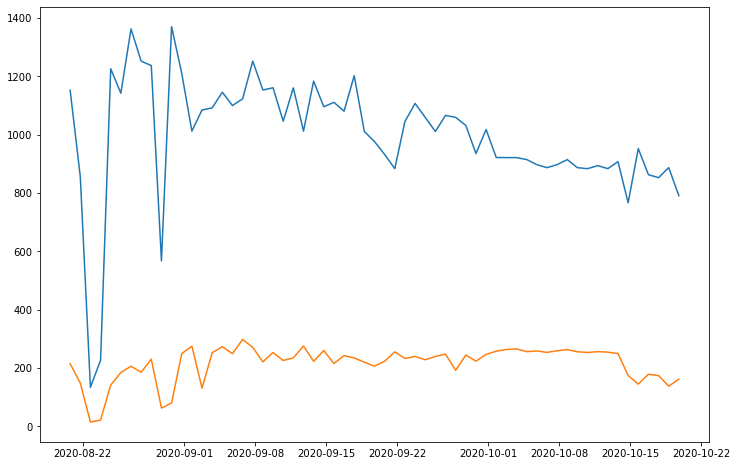

In [82]:
plt.plot(df.resample('D').max()['irradiance'])
plt.plot(df.resample('D').mean()['irradiance'])

In [92]:
df = df.asfreq('H')
df

,ambient_temp,wind_speed,irradiance
date_time,,,
2020-08-21 11:56:01+05:30,28.185780,0.28164,0.000000
2020-08-21 12:56:01+05:30,28.456940,0.28164,48.187481
2020-08-21 13:56:01+05:30,28.848610,0.28164,127.351303
2020-08-21 14:56:01+05:30,29.149891,0.28164,216.841507
2020-08-21 15:56:01+05:30,29.888050,0.28164,99.814743
...,...,...,...
2020-10-20 13:56:01+05:30,29.872990,0.28164,254.702103
2020-10-20 14:56:01+05:30,31.268909,2.68122,461.066406
2020-10-20 15:56:01+05:30,33.281879,1.08150,643.427978


## Now, we have hourly data 

## Fitting a baseline naive model that just predict's the currunt value as the next value

### Splitting the dataset

In [117]:
split = int(df.shape[0]*0.7)

In [118]:
split = int(df.shape[0]*0.7)
train_df = df[:split]
test_df = df[split:]

In [119]:
train_df,test_df

(                           ambient_temp  wind_speed  irradiance
 date_time                                                      
 2020-08-21 11:56:01+05:30     28.185780     0.28164    0.000000
 2020-08-21 12:56:01+05:30     28.456940     0.28164   48.187481
 2020-08-21 13:56:01+05:30     28.848610     0.28164  127.351303
 2020-08-21 14:56:01+05:30     29.149891     0.28164  216.841507
 2020-08-21 15:56:01+05:30     29.888050     0.28164   99.814743
 ...                                 ...         ...         ...
 2020-10-02 10:56:01+05:30     27.094730     0.28164    0.000000
 2020-10-02 11:56:01+05:30     27.138161     0.28164    0.000000
 2020-10-02 12:56:01+05:30     27.261829     0.28164  110.151001
 2020-10-02 13:56:01+05:30     28.336430     1.88136  344.192810
 2020-10-02 14:56:01+05:30     29.760260     1.08150  536.787170
 
 [1012 rows x 3 columns],
                            ambient_temp  wind_speed  irradiance
 date_time                                                    

In [121]:
naive_forecast = df[split - 1:-1]
naive_forecast

,ambient_temp,wind_speed,irradiance
date_time,,,
2020-10-02 14:56:01+05:30,29.760260,1.08150,536.787170
2020-10-02 15:56:01+05:30,31.043110,1.08150,729.444824
2020-10-02 16:56:01+05:30,32.272419,0.28164,846.435120
2020-10-02 17:56:01+05:30,33.702839,2.68122,887.660095
2020-10-02 18:56:01+05:30,34.741581,1.08150,873.734070
...,...,...,...
2020-10-20 12:56:01+05:30,28.080339,0.28164,68.841080
2020-10-20 13:56:01+05:30,29.872990,0.28164,254.702103
2020-10-20 14:56:01+05:30,31.268909,2.68122,461.066406


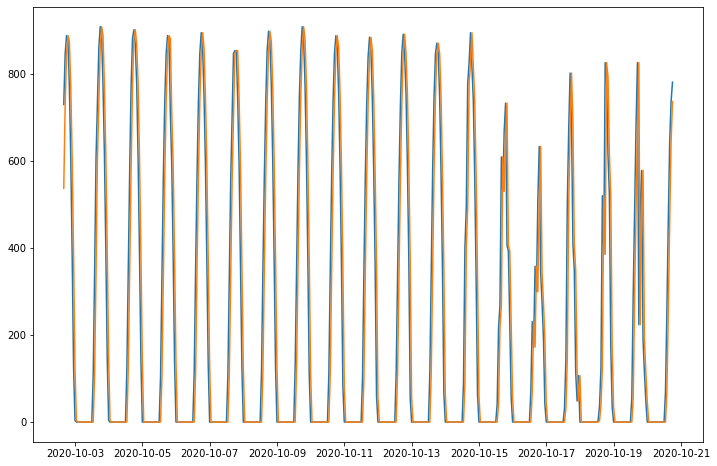

In [125]:
plt.plot(test_df.index,test_df['irradiance'])
plt.plot(test_df.index,naive_forecast['irradiance'])
plt.show()

In [329]:
from sklearn import metrics

def print_score(pred,actual):
    print("Root Mean Squared Error : ",np.sqrt(keras.metrics.mean_squared_error(pred,actual).numpy()))
    print("Mean Absolute Error : ",keras.metrics.mean_absolute_error(pred,actual).numpy())
    print("Mean Absolute Percentage Error : ",keras.metrics.mean_absolute_percentage_error(pred,actual).numpy())

    print("R2 Score : ",sklearn.metrics.r2_score(pred,actual))

In [314]:
print("Root Mean Squared Error : ",np.sqrt(keras.metrics.mean_squared_error(test_df['irradiance'],naive_forecast['irradiance']).numpy()))
print("Mean Absolute Error : ",keras.metrics.mean_absolute_error(test_df['irradiance'],naive_forecast['irradiance']).numpy())
print("Mean Absolute Percentage Error : ",keras.metrics.mean_absolute_percentage_error(test_df['irradiance'],naive_forecast['irradiance']).numpy())


Root Mean Squared Error :  123.64308003866569
Mean Absolute Error :  74.70675639990804
Mean Absolute Percentage Error :  3194697000.111689


In [143]:
from sklearn import metrics

In [145]:
sklearn.metrics.r2_score(test_df['irradiance'],naive_forecast['irradiance'])

0.8488371216701203

## Statistical ARIMA Model

------------------------------

In [152]:
from statsmodels.tsa.arima_model import ARIMA

In [163]:
model = ARIMA(train_df['irradiance'],order=(2,1,2))
arima_res = model.fit(disp=-1)
plt.plot(arima_res.fittedvalues)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MissingDataError: exog contains inf or nans

In [166]:
import tensorflow as tf

## MLP Model

In [167]:
def data_pipeline(irradiance):
    window_size = 10
    dataset = tf.data.Dataset.from_tensor_slices(irradiance)
    dataset = dataset.window(window_size+1,shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1],window[-1]))

    Xs, ys = [], []

    for x,y in dataset:
        Xs.append(x.numpy())
        ys.append(y.numpy())

    Xs = np.array(Xs)
    ys = np.array(ys)

    return Xs,ys

In [168]:
xtrain,ytrain = data_pipeline(train_df['irradiance'])
xtest,ytest = data_pipeline(test_df['irradiance'])

In [190]:
ytest

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 110.1729965 ,
       344.1929016 , 605.5789185 , 736.3297119 , 860.1663818 ,
       908.1311035 , 887.4307251 , 770.4816895 , 612.2581177 ,
       392.1202087 , 144.4653015 ,   3.44079304,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 123.9468002 ,
       357.9605103 , 578.0518799 , 770.7376709 , 880.7178955 ,
       901.2025757 , 866.7930908 , 777.3610229 , 605.3787842 ,
       385.2413025 , 144.4701996 ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 103.2826004 ,
       330.4251099 , 564.3306885 , 736.3258057 , 846.43

In [185]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
mlp_model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
mlp_model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4450
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4552
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4556
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4411
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4524
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4581
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4304
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4465
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4389
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4577


In [175]:
ypred = mlp_model.predict(xtest)

In [180]:
ypred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

## LSTM 

In [ ]:
b

In [360]:
from numpy import array

def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [361]:
n_steps = 20
n_steps_out = 10

X_train,y_train = split_sequence(train_df['irradiance'].fillna(0),n_steps,n_steps_out)
X_test,y_test = split_sequence(test_df['irradiance'].fillna(0),n_steps,n_steps_out)

In [362]:

for i in range(len(X_train)):
    print(X_train[i],y_train[i])

       0.         103.2659988
  330.4251099  550.5825806  729.4456177  867.0797729 1028.796021
  932.322876   839.3499756  598.5036011  385.2408142  178.9163055] [6.88158417 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[   0.            0.            0.            0.            0.
    0.            0.            0.          103.2659988   330.4251099
  550.5825806   729.4456177   867.0797729  1028.796021    932.322876
  839.3499756   598.5036011   385.2408142   178.9163055     6.88158417] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.            0.            0.            0.            0.
    0.            0.          103.2659988   330.4251099   550.5825806
  729.4456177   867.0797729  1028.796021    932.322876    839.3499756
  598.5036011   385.2408142   178.9163055     6.88158417    0.        ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.            0.            0.            0.            0.
    0.          103.2659988   330.4251099   550.5825806  

In [368]:
from tensorflow.keras import optimizers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu',input_dim=n_steps))
model.add(tf.keras.layers.Dense(n_steps_out))
model.compile(optimizer='adam',loss='mse')

In [371]:
y_train.shape

(983, 10)

In [370]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
31/31 [==============================] - 2s 3ms/step - loss: 120993.2498
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 56089.1521
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 42280.5682
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 38307.0280
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 40239.3270
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 38043.4660
Epoch 7/50
31/31 [==============================] - 0s 5ms/step - loss: 39055.2634
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 34834.5139
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 37229.4976
Epoch 10/50
31/31 [==============================] - 0s 4ms/step - loss: 34165.4443
Epoch 11/50
31/31 [==============================] - 0s 4ms/step - loss: 37647.9545
Epoch 12/50
31/31 [==============================] - 0s 4ms/step - loss: 36568.8322


In [372]:
y_pred = model.predict(X_test)

In [373]:
y_pred.shape

(406, 10)

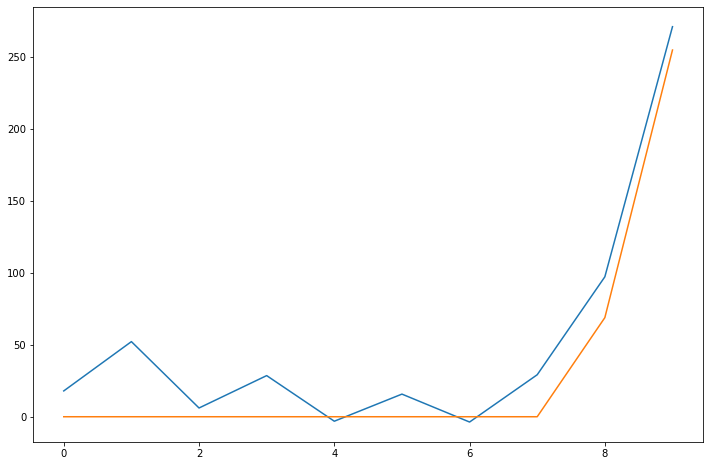

In [374]:
print_score(y_pred,y_test)

Root Mean Squared Error :  [ 95.96529732 138.49544379 152.66646134 108.44746578  47.22152227
  37.24439186  73.47437173  80.56956156  21.62477348  16.87421447
  16.60607606  13.03874546  18.21135585  16.71962465  16.44133316
  23.79880298  16.82992938  28.14709395  36.67578608  80.53682164
 107.21372616 118.06523589 100.25502463  98.73538014  94.45034073
 137.40450714 143.49489366  94.73921115  48.46602955  28.48740007
  54.49023097  67.9574736   24.82851346  15.7516988   17.76381387
  13.67545975  16.65306082  16.10326862  17.70304096  23.03369244
  16.10009948  20.71958265  30.6372515   69.89260392  86.83560157
  98.1912133   83.86116274  88.62750824  73.83902328 120.90194778
 137.64944277  99.29850068  48.67199799  32.61102304  53.84395827
  68.17612719  15.46077639  17.76117192  17.66550702  13.94118338
  17.46212604  16.81736831  15.72622975  22.17598716  15.8596694
  27.59980055  38.51424619  77.72590044 101.61758511 113.21051694
 101.38179127  98.81642819  92.42337244 138.041970

In [328]:
print("Root Mean Squared Error : ",np.sqrt(keras.metrics.mean_squared_error(y_pred.reshape(-1),y_test).numpy()))
print("Mean Absolute Error : ",keras.metrics.mean_absolute_error(test_df['irradiance'],naive_forecast['irradiance']).numpy())
print("Mean Absolute Percentage Error : ",keras.metrics.mean_absolute_percentage_error(test_df['irradiance'],naive_forecast['irradiance']).numpy())


Root Mean Squared Error :  103.48599995778571
Mean Absolute Error :  74.70675639990804
Mean Absolute Percentage Error :  3194697000.111689


In [304]:
y_test.reshape(-1).shape

(432,)

In [389]:
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = keras.metrics.mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = np.sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = np.sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores


In [390]:
evaluate_forecasts(y_test,y_pred)

(92.31933427383508,
 [80.11391,
  90.032906,
  98.73733,
  106.645325,
  94.87477,
  87.416985,
  90.13453,
  91.95323,
  95.20155,
  85.41798])